<a href="https://colab.research.google.com/github/LiemHuynh0311/Homework_w5/blob/main/homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

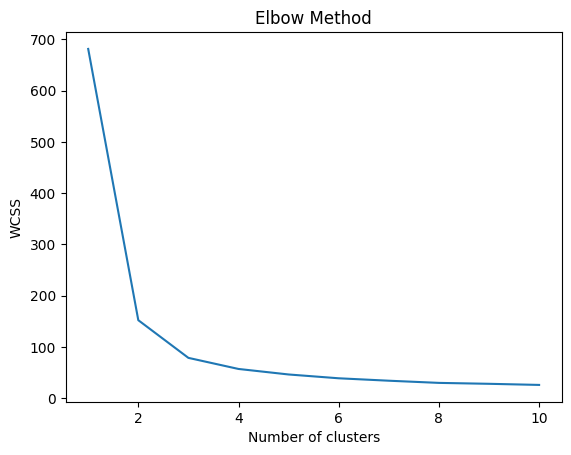

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Logistic Regression without PCA:
Accuracy without PCA: 0.9165
Time without PCA: 128.1549141407013 seconds

Logistic Regression with PCA:
Accuracy with PCA: 0.9216428571428571
Time with PCA: 60.27034306526184 seconds


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time


# Load the Iris dataset
iris = load_iris()
X = iris.data

# Initialize a list to store the values of the within-cluster sum of squares (WCSS)
wcss = []

# Determine the optimal number of clusters using the elbow method
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# Load MNIST data
mnist = fetch_openml('mnist_784', version=1, return_X_y=True)
X_mnist, y_mnist = mnist

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply logistic regression without PCA
start = time.time()
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=1000)
logisticRegr.fit(X_train_scaled, y_train)
end = time.time()
time_without_pca = end - start
predictions = logisticRegr.predict(X_test_scaled)
accuracy_without_pca = accuracy_score(y_test, predictions)

# Apply PCA
pca = PCA(0.95) # retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Apply logistic regression with PCA
start = time.time()
logisticRegr_pca = LogisticRegression(solver = 'lbfgs', max_iter=1000)
logisticRegr_pca.fit(X_train_pca, y_train)
end = time.time()
time_with_pca = end - start
predictions_pca = logisticRegr_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, predictions_pca)

# Compare time with PCA and without PCA
print("Logistic Regression without PCA:")
print(f"Accuracy without PCA: {accuracy_without_pca}")
print(f"Time without PCA: {time_without_pca} seconds")
print("\nLogistic Regression with PCA:")
print(f"Accuracy with PCA: {accuracy_with_pca}")
print(f"Time with PCA: {time_with_pca} seconds")

